In [43]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',#set the limit to how many rows you want
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2cbc5a9b-b549-40cb-a084-bd62d829aa32',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-07-14T22:54:29.725Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 9974}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11597, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [44]:
type(data)

dict

In [45]:
import pandas as pd

In [46]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-07-14T22:54:29.725Z,0,None,39,1,None,9974


In [47]:
df=pd.json_normalize(data['data'])

In [48]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19720325.00000,19720325.00000,...,1200957207237.36157,53.71200,1278888727847.26001,None,2024-07-14T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215726.06015,120215726.06015,...,390570707655.96259,17.46800,390570707655.96002,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,91529,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112466925458.78345,116072162582.33752,...,112505266195.85561,5.03260,116111732369.17999,None,2024-07-14T22:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582260.27316,147582260.27316,...,80473832426.84181,3.59970,80473832426.84000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464059130.93189,580139488.20897,...,68334315961.73418,3.05670,85427551031.14000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,20950,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33953608292.03121,33953608292.03121,...,33951174761.07152,1.51870,33951174761.07000,None,2024-07-14T22:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,...,29506450346.60649,1.31990,52873883799.03000,None,2024-07-14T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506939251.57006,5108990122.18713,...,18507201502.12897,0.82790,37716554002.85000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,1022,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145117456383.70523,145117456383.70523,...,16709315977.99026,0.74740,16709315977.99000,None,2024-07-14T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN
9,2010,Cardano,ADA,cardano,1212,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35881016713.03700,37048613783.37100,...,15550967876.02926,0.69560,19503169601.30000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN


In [49]:
df['Timestamp']=pd.to_datetime('now')

In [50]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19720325.00000,19720325.00000,...,53.71200,1278888727847.26001,None,2024-07-14T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215726.06015,120215726.06015,...,17.46800,390570707655.96002,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
2,825,Tether USDt,USDT,tether,91529,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112466925458.78345,116072162582.33752,...,5.03260,116111732369.17999,None,2024-07-14T22:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 16:54:38.597602
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582260.27316,147582260.27316,...,3.59970,80473832426.84000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464059130.93189,580139488.20897,...,3.05670,85427551031.14000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
5,3408,USDC,USDC,usd-coin,20950,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33953608292.03121,33953608292.03121,...,1.51870,33951174761.07000,None,2024-07-14T22:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 16:54:38.597602
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,...,1.31990,52873883799.03000,None,2024-07-14T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506939251.57006,5108990122.18713,...,0.82790,37716554002.85000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
8,74,Dogecoin,DOGE,dogecoin,1022,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145117456383.70523,145117456383.70523,...,0.74740,16709315977.99000,None,2024-07-14T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
9,2010,Cardano,ADA,cardano,1212,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35881016713.03700,37048613783.37100,...,0.69560,19503169601.30000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602


In [52]:
def api_runner():
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',#set the limit to how many rows you want
      'convert':'USD'
        }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2cbc5a9b-b549-40cb-a084-bd62d829aa32',
                }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
    df=pd.json_normalize(data['data'])
    df['Timestamp']=pd.to_datetime('now')  
    df
    if not os.path.isfile(r"C:\Users\Mahroosa\Desktop\Test datasets\API1.csv"):
        df.to_csv(r"C:\Users\Mahroosa\Desktop\Test datasets\API1.csv",header='column_names')
    else:
        df.to_csv(r"C:\Users\Mahroosa\Desktop\Test datasets\API1.csv",mode='a',header=False)

In [53]:
import os
from time import time
from time import sleep

#333 because the API is allowing us to use it 333 times max a day
for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60)
exit()
    

API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [54]:
df1=pd.read_csv(r"C:\Users\Mahroosa\Desktop\Test datasets\API1.csv")

In [55]:
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19720325.00000,...,53.72600,1279221922198.04004,NaN,2024-07-14T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:56:54.532434
1,1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120215726.06015,...,17.46970,390608073653.34998,NaN,2024-07-14T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:56:54.532434
2,2,825,Tether USDt,USDT,tether,91529,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112466925458.78345,...,5.03310,116124366959.33000,NaN,2024-07-14T22:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 16:56:54.532434
3,3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147582260.27316,...,3.60190,80522459765.14999,NaN,2024-07-14T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:56:54.532434
4,4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,464059130.93189,...,3.06150,85560230850.14999,NaN,2024-07-14T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:56:54.532434
5,5,3408,USDC,USDC,usd-coin,20950,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33953608292.03121,...,1.51910,33960036237.83000,NaN,2024-07-14T22:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 16:56:54.532434
6,6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55805339473.00000,...,1.32080,52909504160.25000,NaN,2024-07-14T22:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:56:54.532434
7,7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2506939251.57006,...,0.82810,37729615257.18000,NaN,2024-07-14T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:56:54.532434
8,8,74,Dogecoin,DOGE,dogecoin,1022,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,145117456383.70523,...,0.74740,16708723010.79000,NaN,2024-07-14T22:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:56:54.532434
9,9,2010,Cardano,ADA,cardano,1212,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35881016713.03700,...,0.69650,19526424951.64000,NaN,2024-07-14T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:56:54.532434


In [56]:
df3=pd.read_csv(r'C:\Users\Mahroosa\Desktop\Test datasets\API.csv')

In [57]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19720200.00000,...,53.30070,1231697626369.76001,NaN,2024-07-13T19:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-13 13:45:36.896311
1,1,1027,Ethereum,ETH,ethereum,9130,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120213385.00619,...,17.50350,379896721755.54999,NaN,2024-07-13T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-13 13:45:36.896311
2,2,825,Tether USDt,USDT,tether,91508,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112417360493.78345,...,5.18250,116116462723.69000,NaN,2024-07-13T19:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-13 13:45:36.896311
3,3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147582320.33181,...,3.60310,78202399262.05000,NaN,2024-07-13T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-13 13:45:36.896311
4,4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,464070879.21058,...,2.98940,81111682512.73000,NaN,2024-07-13T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-13 13:45:36.896311
5,5,3408,USDC,USDC,usd-coin,20937,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33925654891.90542,...,1.56330,33930624845.64000,NaN,2024-07-13T19:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-13 13:45:36.896311
6,6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55805339473.00000,...,1.41660,55085218104.27000,NaN,2024-07-13T19:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-13 13:45:36.896311
7,7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2506892521.81720,...,0.84560,37404264836.46000,NaN,2024-07-13T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-13 13:45:36.896311
8,8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,145102346383.70517,...,0.74990,16276437325.81000,NaN,2024-07-13T19:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-13 13:45:36.896311
9,9,2010,Cardano,ADA,cardano,1211,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35881040846.47100,...,0.72640,19773902149.35000,NaN,2024-07-13T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-13 13:45:36.896311


In [58]:
#to make the numbers more readible by removing e

In [59]:
pd.set_option('display.float.format',lambda x: '%.5f' % x)

In [60]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19720325.00000,19720325.00000,...,53.71200,1278888727847.26001,None,2024-07-14T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215726.06015,120215726.06015,...,17.46800,390570707655.96002,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
2,825,Tether USDt,USDT,tether,91529,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112466925458.78345,116072162582.33752,...,5.03260,116111732369.17999,None,2024-07-14T22:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 16:54:38.597602
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582260.27316,147582260.27316,...,3.59970,80473832426.84000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464059130.93189,580139488.20897,...,3.05670,85427551031.14000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
5,3408,USDC,USDC,usd-coin,20950,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33953608292.03121,33953608292.03121,...,1.51870,33951174761.07000,None,2024-07-14T22:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 16:54:38.597602
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,...,1.31990,52873883799.03000,None,2024-07-14T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506939251.57006,5108990122.18713,...,0.82790,37716554002.85000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
8,74,Dogecoin,DOGE,dogecoin,1022,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145117456383.70523,145117456383.70523,...,0.74740,16709315977.99000,None,2024-07-14T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602
9,2010,Cardano,ADA,cardano,1212,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35881016713.03700,37048613783.37100,...,0.69560,19503169601.30000,None,2024-07-14T22:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 16:54:38.597602


In [61]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'Timestamp'],
      dtype='object')

In [62]:
df4=df.groupby('name',sort=False)[['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d','quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean()

In [63]:
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.30741,3.21718,7.86127,-7.70059,-7.88447,-3.72607
Ethereum,0.04417,2.16987,10.40321,-6.53577,7.75966,4.18214
Tether USDt,-0.00083,-0.01182,0.03899,0.09295,-0.00895,-0.00002
BNB,0.37400,2.69668,10.56858,-9.16056,-6.76625,-2.12368
Solana,-0.32752,4.35927,10.30493,3.15064,-5.52312,5.55940
USDC,-0.00700,-0.00094,-0.01169,-0.00424,0.00145,-0.01582
XRP,0.16879,0.53834,25.29162,11.55203,2.07588,6.21475
Toncoin,0.14484,1.23992,3.60867,-10.02753,5.88627,10.80317
Dogecoin,0.50113,2.59850,9.81688,-14.45863,-25.83759,-28.48359


In [64]:
df5=df4.stack()

In [65]:
df5

name                                   
Bitcoin    quote.USD.percent_change_1h    -0.30741
           quote.USD.percent_change_24h    3.21718
           quote.USD.percent_change_7d     7.86127
           quote.USD.percent_change_30d   -7.70059
           quote.USD.percent_change_60d   -7.88447
                                            ...   
Chainlink  quote.USD.percent_change_24h    3.35296
           quote.USD.percent_change_7d     8.84796
           quote.USD.percent_change_30d   -8.36045
           quote.USD.percent_change_60d   -3.09657
           quote.USD.percent_change_90d   -1.48665
Length: 90, dtype: float64

In [66]:
type(df5)

pandas.core.series.Series

In [67]:
df6=df5.to_frame(name='values')

In [68]:
df6

values
name                                           
Bitcoin   quote.USD.percent_change_1h  -0.30741
          quote.USD.percent_change_24h  3.21718
          quote.USD.percent_change_7d   7.86127
          quote.USD.percent_change_30d -7.70059
          quote.USD.percent_change_60d -7.88447
...                                         ...
Chainlink quote.USD.percent_change_24h  3.35296
          quote.USD.percent_change_7d   8.84796
          quote.USD.percent_change_30d -8.36045
          quote.USD.percent_change_60d -3.09657
          quote.USD.percent_change_90d -1.48665

[90 rows x 1 columns]

In [69]:
df6.count()


values    90
dtype: int64

In [70]:
index=pd.Index(range(90))
df7=df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.30741
1,Bitcoin,quote.USD.percent_change_24h,3.21718
2,Bitcoin,quote.USD.percent_change_7d,7.86127
3,Bitcoin,quote.USD.percent_change_30d,-7.70059
4,Bitcoin,quote.USD.percent_change_60d,-7.88447
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,3.35296
86,Chainlink,quote.USD.percent_change_7d,8.84796
87,Chainlink,quote.USD.percent_change_30d,-8.36045
88,Chainlink,quote.USD.percent_change_60d,-3.09657


In [71]:
df7=df7.rename(columns={'level_1':'percent_change'})

In [72]:
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.30741
1,Bitcoin,quote.USD.percent_change_24h,3.21718
2,Bitcoin,quote.USD.percent_change_7d,7.86127
3,Bitcoin,quote.USD.percent_change_30d,-7.70059
4,Bitcoin,quote.USD.percent_change_60d,-7.88447
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,3.35296
86,Chainlink,quote.USD.percent_change_7d,8.84796
87,Chainlink,quote.USD.percent_change_30d,-8.36045
88,Chainlink,quote.USD.percent_change_60d,-3.09657


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.30741
1,Bitcoin,quote.USD.percent_change_24h,3.21718
2,Bitcoin,quote.USD.percent_change_7d,7.86127
3,Bitcoin,quote.USD.percent_change_30d,-7.70059
4,Bitcoin,quote.USD.percent_change_60d,-7.88447
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,3.35296
86,Chainlink,quote.USD.percent_change_7d,8.84796
87,Chainlink,quote.USD.percent_change_30d,-8.36045
88,Chainlink,quote.USD.percent_change_60d,-3.09657


In [75]:
df7['percent_change']=df7['percent_change'].str.replace('quote.USD.percent_change_','')

In [76]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.30741
1,Bitcoin,24h,3.21718
2,Bitcoin,7d,7.86127
3,Bitcoin,30d,-7.70059
4,Bitcoin,60d,-7.88447
...,...,...,...
85,Chainlink,24h,3.35296
86,Chainlink,7d,8.84796
87,Chainlink,30d,-8.36045
88,Chainlink,60d,-3.09657


In [77]:
df7.columns

Index(['name', 'percent_change', 'values'], dtype='object')

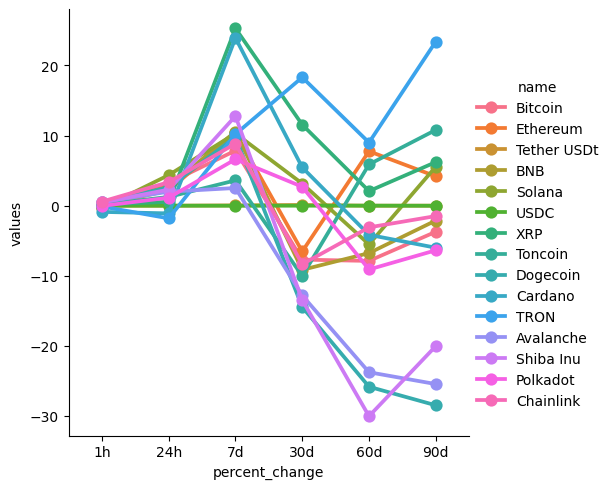

In [78]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [81]:
df1.columns

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'Timestamp'],
      dtype='object')

In [82]:
df8=df1[['name','quote.USD.price','Timestamp']]

In [83]:
df8

,name,quote.USD.price,Timestamp
0,Bitcoin,60915.32963,2024-07-14 16:56:54.532434
1,Ethereum,3249.22609,2024-07-14 16:56:54.532434
2,Tether USDt,1.00045,2024-07-14 16:56:54.532434
3,BNB,545.61070,2024-07-14 16:56:54.532434
4,Solana,147.48217,2024-07-14 16:56:54.532434
5,USDC,1.00019,2024-07-14 16:56:54.532434
6,XRP,0.52910,2024-07-14 16:56:54.532434
7,Toncoin,7.38495,2024-07-14 16:56:54.532434
8,Dogecoin,0.11514,2024-07-14 16:56:54.532434
9,Cardano,0.43392,2024-07-14 16:56:54.532434


In [86]:
df9=df8.query('name == "Bitcoin"')
df9

,name,quote.USD.price,Timestamp
0,Bitcoin,60915.32963,2024-07-14 16:56:54.532434
15,Bitcoin,60944.23536,2024-07-14 16:57:54.919456
30,Bitcoin,60907.23889,2024-07-14 16:58:55.279021


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

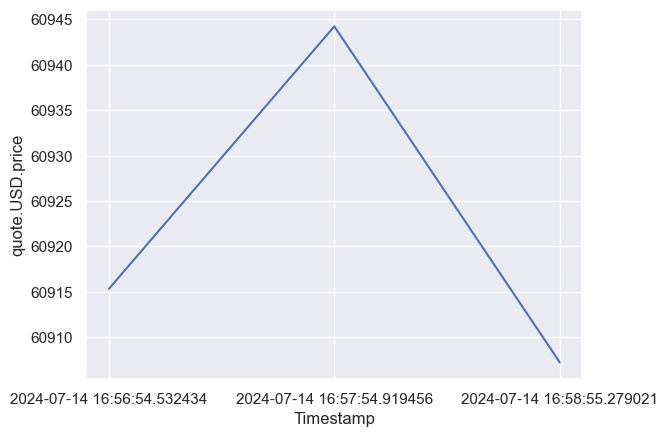

In [90]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df9,x='Timestamp',y='quote.USD.price')